OK: C:/DATA/500_AD/S13-AA5 contains some Bruker spectra acquired with a noesy sequence
OK: all spectra reported in the sample table appear to match a spectrum under C:/DATA/500_AD/S13-AA5
OK: the sample table has at least 4 columns with one named 'F_dilution'
OK: C:/DATA/500_AD/QC-QS contains some Bruker spectra acquired with a noesy sequence
OK: the standard profile format seems correct
OK: the quantification profile format seems correct
OK: output directories are correctly defined
Success: 0 errors,  0 warnings


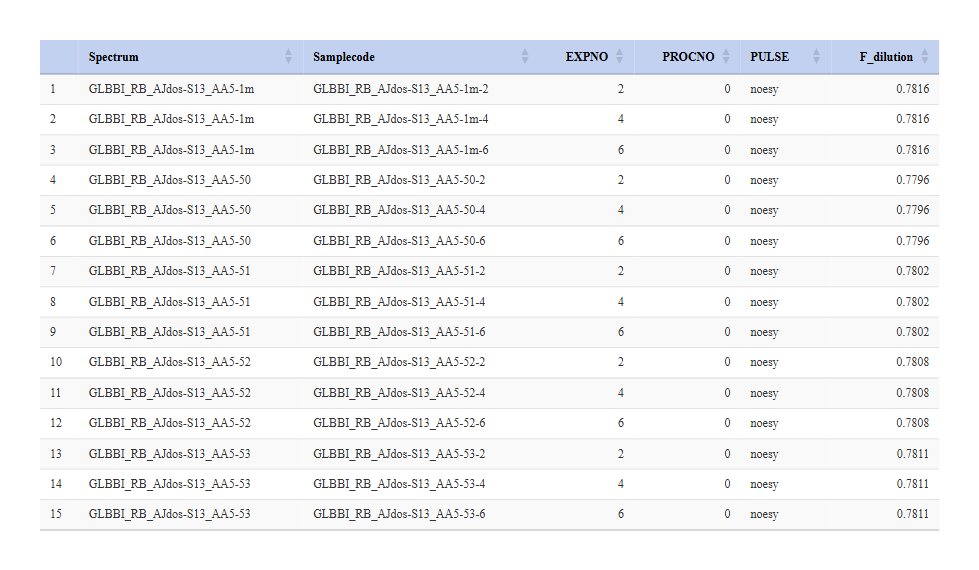


compound list = fructose 



In [1]:
suppressMessages(library(RnmrQuant1D))

RDATADIR <- 'tmp/RData/noesy';
load(file.path(RDATADIR,"RQ1D.RData"))  
rq1d$check_all(verbose=TRUE)
rq1d$OUTTYPE <- "png"

# Display samples table
rq1d$displayTable(rq1d$SAMPLES, nbdec=4)

# Show compound list
cmpdlist <- rq1d$quantpars$cmpdlist
cat("\ncompound list =",paste(cmpdlist, collapse=", "),"\n\n")

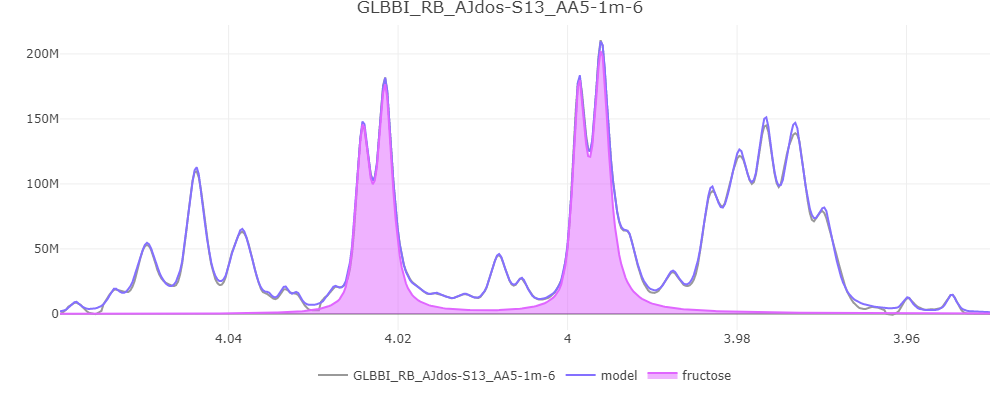

     [,1]       [,2]         
[1,] "fructose" "12,13,22,23"

     pos      ppm       amp        sigma     asym       eta integral
12 29359 3.996014 192997408 0.0010942094 44.76171 0.9384926 655192.6
13 29369 3.998657 153889999 0.0008040208 50.00000 0.6500000 361214.0
22 29463 4.021525 167051750 0.0009724597 50.00000 0.7733727 486978.4
23 29474 4.024172 130857660 0.0008721992 50.00000 0.6500000 333197.5



In [2]:
# Get all spectra data into memory
rq1d$get_spectra_data()

ID <- 3 # sample(1:nrow(rq1d$samples),1)
cmpd <- c('fructose' ) # cmpdlist[sample(1:length(cmpdlist),1)]

rq1d$displayWidget(rq1d$plot_spectra(ID, cmpd, plotmodel=TRUE, plotTrueSpec=FALSE, plotzones=FALSE, 
                    tags='none', legendhoriz=TRUE, verbose=TRUE),width=1000)

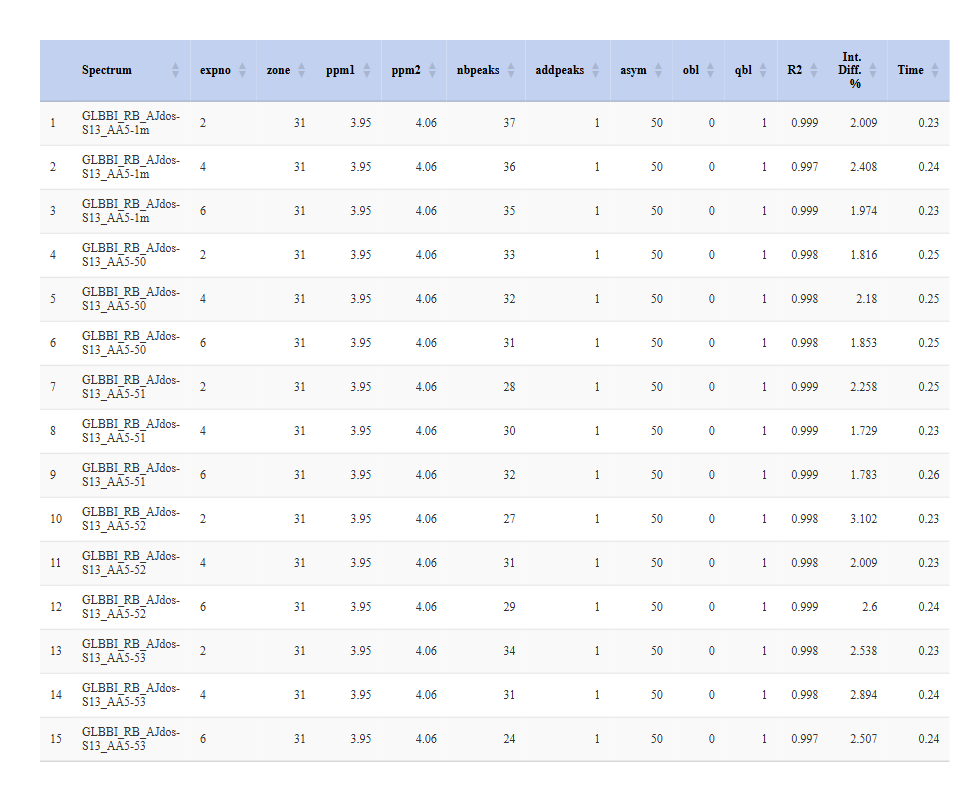

In [3]:
# Get all results into memory
out <- rq1d$get_output_results()
zones <- rq1d$PROFILE$quantif[rq1d$PROFILE$quantif$compound %in% rq1d$quantpars$cmpdlist,,drop=F]$zone
rq1d$displayTable(out$fitinfos[out$fitinfos$zone %in% zones, ], nbdec=3)